In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
from tools import *

In [20]:
path = "images-photographes"
new_path = "images-photographes_preprocessed"
new_path_cropped = "images-photographes_preprocessed_cropped"
inames, ilabels, class_names = load_dataset(path)

In [3]:
def image_resize(image, width = None, height = None, inter = cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [22]:
for x in tqdm.tqdm(inames):
    p = os.path.join(path, x)
    img = cv.imread(p)
    resized = image_resize(img, height = 1024)
    
    pp = os.path.join(new_path, x)
    cv.imwrite(pp, resized)  
    
    
print(624)

100%|████████████████████████████████████████████████████████████████████████████████| 280/280 [00:24<00:00, 11.50it/s]

624


In [23]:
inames, ilabels, class_names = load_dataset(new_path)

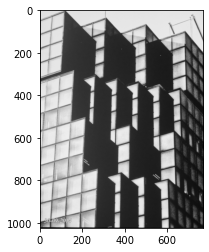

In [24]:
w = 312
p = os.path.join(new_path, inames[0])
img = cv.imread(p)
plt.imshow(img)

In [25]:
img.shape

(1024, 768, 3)

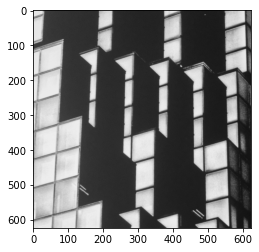

In [26]:
w = img.shape[0]//2
h = img.shape[1]//2

new_w = w - 312
new_h = h - 312

plt.imshow(img[w-312 : w+312, h-312 : h+312])


In [28]:
for x in tqdm.tqdm(inames):
    p = os.path.join(new_path, x)
    img = cv.imread(p)
    w = img.shape[0]//2
    h = img.shape[1]//2

    cropped = img[w-312 : w+312, h-312 : h+312]
    pp = os.path.join(new_path_cropped, x)
    cv.imwrite(pp, cropped)  

100%|████████████████████████████████████████████████████████████████████████████████| 280/280 [00:10<00:00, 26.95it/s]
